In [1]:
import numpy as np
from dbesg import SmithWilson, NelsonSiegel

In [9]:
SmithWilson

array([0.01301   , 0.01304585, 0.01307034, ..., 0.05198154, 0.0519817 ,
       0.05198185])

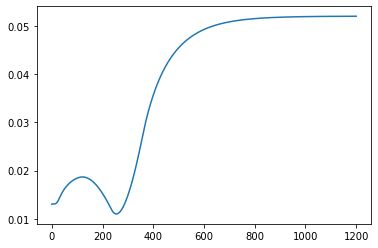

In [4]:
maturity = np.array([1, 3, 5, 10, 20, 30])
rate = np.array([0.01301, 0.01325, 0.01415, 0.01600, 0.01625, 0.01604])
alpha, ufr = 0.1, 0.052
sw = SmithWilson(alpha, ufr)
sw.set_params(maturity, rate)
t = np.linspace(0, 100, 1201)
spot = sw.spot_rate(t)
forward = sw.forward_rate(t, 1)